# Project: Wrangling and Analyze Data

#### Project Details

Your tasks in this project are as follows:

1. Data wrangling, which consists of:
    - Gathering data
    - Assessing data
    - Cleaning data

2. Storing, analyzing, and visualizing your wrangled data
3. Reporting on:
    A. your data wrangling efforts and 
    B. your data analyses and visualizations

#### Instructions for Gathering Data

Gather each of the three pieces of data as described below in a Jupyter Notebook titled `wrangle_act.ipynb`:

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (`image_predictions.tsv`) is hosted on Udacity's servers and should be downloaded programmatically using the [Requests](http://docs.python-requests.org/en/master/) library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the *tweet IDs* in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's [Tweepy](http://www.tweepy.org/) library and store each tweet's entire set of JSON data in a file called **`tweet_json.txt`** file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum):
    - tweet ID 
    - retweet count 
    - favorite count 

*Note: do not include your Twitter API keys, secrets, and tokens in your project submission.*

If you decide to complete your project in the Project Workspace, note that you can upload files to the Jupyter Notebook Workspace by clicking the "Upload" button in the top righthand corner of the dashboard.

#### Key points to keep in mind when data wrangling for this project:

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least **8 quality issues** and at least **2 tidiness issues** in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond **August 1st, 2017**. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [1]:
#Importing necessary libraries
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import tweepy
%matplotlib inline
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# use requests library to download the image prediction file using the link provided in the documentation.
predct_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(predct_url, auth=('user', 'pass'))

# save the downloaded file 
with open(predct_url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# load the file into a dataframe
img_predict_df = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
tweet_list = []

json_file = open('tweet-json.txt', "r")

for ln in json_file:
    try:
        twt = json.loads(ln)
        tweet_list.append(twt)
    except:
        continue
        
json_file.close()

## Step 2: Create a dataframe

tweet_df = pd.DataFrame()

tweet_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_list))
tweet_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_list))
tweet_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_list))
tweet_df['created_at'] = list(map(lambda tweet: tweet['created_at'], tweet_list))
tweet_df['full_text'] = list(map(lambda tweet: tweet['full_text'], tweet_list))

In [5]:
tweet_df.info()
tweet_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
created_at        2354 non-null object
full_text         2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...


## Assessing Data

### Dataset 1: WeRateDogs Twitter archive

In [6]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df.shape

(2356, 17)

In [9]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
# Duplicated values:
df.duplicated().sum()

0

In [11]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## Dataset 2: Image Predictions

In [13]:
img_predict_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
img_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
img_predict_df.duplicated().sum()

0

In [16]:
img_predict_df['jpg_url'].duplicated().sum()

66

## Dataset 3: Tweet API data

In [17]:
tweet_df

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...
5,891087950875897856,3261,20562,Sat Jul 29 00:08:17 +0000 2017,Here we have a majestic great white breaching ...
6,890971913173991426,2158,12041,Fri Jul 28 16:27:12 +0000 2017,Meet Jax. He enjoys ice cream so much he gets ...
7,890729181411237888,16716,56848,Fri Jul 28 00:22:40 +0000 2017,When you watch your owner call another dog a g...
8,890609185150312448,4429,28226,Thu Jul 27 16:25:51 +0000 2017,This is Zoey. She doesn't want to be one of th...
9,890240255349198849,7711,32467,Wed Jul 26 15:59:51 +0000 2017,This is Cassie. She is a college pup. Studying...


In [18]:
tweet_df.info

<bound method DataFrame.info of                 tweet_id  retweet_count  favorite_count  \
0     892420643555336193           8853           39467   
1     892177421306343426           6514           33819   
2     891815181378084864           4328           25461   
3     891689557279858688           8964           42908   
4     891327558926688256           9774           41048   
5     891087950875897856           3261           20562   
6     890971913173991426           2158           12041   
7     890729181411237888          16716           56848   
8     890609185150312448           4429           28226   
9     890240255349198849           7711           32467   
10    890006608113172480           7624           31166   
11    889880896479866881           5156           28268   
12    889665388333682689           8538           38818   
13    889638837579907072           4735           27672   
14    889531135344209921           2321           15359   
15    889278841981685760

In [19]:
tweet_df.shape

(2354, 5)

In [20]:
tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
created_at        0
full_text         0
dtype: int64

## Assessment Summary:

### Data Quality

#### **1. Missing Data**

**Tweet Archive Dataset**
- `name`: 715 tweets that have *None* as a name


#### **2. Data type issues**:

**Tweet Archive Dataset**:
- rating_numerator should be a float
- rating_denominator should be a float

**Image Prediction Dataset**:
- `tweet_id` should be object.

**Tweet API dataset**
- `tweet_id`: The current type is int64, I will convert it to object since there is no calculation required.
- `created_at`: The current type is object (str) rather than datetime. I will change it to datetime.
- `retweet_count` and `favorite_count` should be integers

#### **3. Content Issues**

**Tweet Archive Dataset**:
- `name`: has invalid values, such as : None, a, an, the.
- ratings include erroneous values. For example, there is a tweet where the denominator is 0. Also, there are tweets where the text include more than one rating pattern (##/##).
- I found 1 dog that is both *doggo* and *floofer*.
- I found 12 dogs that are both *doggo* and *pupper*.
- I found 1 dog that is both *doggo* and *puppo*.
- `retweeted_status_id`, `retweeted_status_id`, `retweeted_status_user_id`: I found 181 retweets. The retweets and the respective columns will be removed from the dataset.
- `in_reply_to_status_id, in_reply_to_user_id`: columns to be dropped. 

**Image Prediction Dataset**:
- `p1`, `p2`, `p3`: Some entries are lower case. also, some entries have underscore.

#### **Other Quality Issues**
- Create seperate columns for date from time.
- Parse the column `source` to show the direct source (for ex: iphone, tweetdeck, etc.) rather than the HTML statement.
- Create a new column called `rating_ratio` which is `rating_numerator` divided by `rating_denominator`.


### Data Tidiness:

- Merge the three datasets.
- `full_text`: Some tweets reference more than one dog and include multiple stages and ratings. I will create a new column called `stage` to include the dog stage and delete the four columns. For tweets that reference multiple stages, the `stage` will include additional stages, such as: doggo|pupper, doggo|floofer, and doggo|puppo.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data

df_clean= df.copy()
img_predict_df_clean= img_predict_df.copy()
tweet_df_clean = tweet_df.copy()

### Issue #1:

#### Define:

Merge the 3 datasets using INNER join.

#### Code

In [22]:
# Merge the 3 dataframes based on the tweet_id column:

tweet_full_df = pd.merge(df_clean, img_predict_df_clean, how = 'inner', on = ['tweet_id'] )
tweet_full_df = pd.merge(tweet_full_df, tweet_df_clean, how = 'inner', on = ['tweet_id'])
tweet_full_df.to_csv('tweet_full.csv', encoding = 'utf-8')

#### Test

In [23]:
tweet_full_df.shape[0]
tweet_full_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...


In [24]:
# Create a copy of the merged dataframe to work on and keep the original dataframe for reference

tweet_full_df_clean = tweet_full_df.copy()
tweet_full_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

### Issue #2:

#### Define

- Delete the following columns: retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp, timestamp, text, in_reply_to_status_id, in_reply_to_user_id
- Delete retweets from the dataset


#### Code

In [25]:
# Delete retweets

tweet_full_df_clean = tweet_full_df_clean[pd.isnull(tweet_full_df_clean.retweeted_status_id)]

In [26]:
# Define a list of the columns to be dropped

drop_col = ['retweeted_status_id', 
            'retweeted_status_user_id', 
            'retweeted_status_timestamp', 
            'timestamp',
            'text',
            'in_reply_to_status_id',
            'in_reply_to_user_id']

tweet_full_df_clean = tweet_full_df_clean.drop(drop_col, 1)

#### Test

In [27]:
tweet_full_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              1994 non-null int64
source                1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bo

In [28]:
tweet_full_df_clean.shape

(1994, 25)

***Define***

- Create separate columns for date a time based on the created_at column.
- Timestamp column should be date time type

***Code***

In [29]:
# Convert `created_at` from object to datetime

tweet_full_df_clean['created_at'] = pd.to_datetime(tweet_full_df_clean['created_at'])

# Create new columns `date` and `time` based on `created_at`

tweet_full_df_clean['date'] = tweet_full_df_clean['created_at'].dt.date
tweet_full_df_clean['time'] = tweet_full_df_clean['created_at'].dt.time

# Drop `created_at` column
tweet_full_df_clean = tweet_full_df_clean.drop('created_at', 1)

***Test***

In [30]:
tweet_full_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id              1994 non-null int64
source                1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bo

***Define***

- Parse the column `source` to show the direct source (for ex: Tweeter for iPhone) rather than the full link.
- Convert the datatype of:
 1. `tweet_id` to object.
 2. `rating_numerator` and `rating_denominator` to float.

***Code***

In [31]:
# Display the values in the source column

tweet_full_df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [32]:
# Create a regular expression to extract the string between the tags: <> <>
tweet_full_df_clean['source'] = tweet_full_df_clean.source.str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', 
                                                                       expand = True)[4];

# Change source to category
tweet_full_df_clean['source'] = tweet_full_df_clean['source'].astype('category')

# test the parsing process
tweet_full_df_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [33]:
# Convert the datatypes of the columns below to appropiate datatypes

tweet_full_df_clean['tweet_id'] = tweet_full_df_clean['tweet_id'].astype('str')
tweet_full_df_clean['rating_numerator'] = tweet_full_df_clean['rating_numerator'].astype('float')
tweet_full_df_clean['rating_denominator'] = tweet_full_df_clean['rating_denominator'].astype('float')

***Test***

In [34]:
tweet_full_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id              1994 non-null object
source                1994 non-null category
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-

***Define***

- Check for null and duplicates after merging the datasets and drop retweet records from the dataset.
- Change the content of columns `p1`, `p2`, `p3` to capital letter and remove underscore.
- Isolate the erraneous values for the denominator and numerator columns, review the full_text, identify the problem and fix it programmatically, if possible.
- Create a new column called `rating_ratio` which is `rating_numerator` divided by `rating_denominator`.
- Correct erroneous names
- Change the value None in the column `name` to Null

***Code***

In [35]:
# Check for Null values

tweet_full_df_clean.isnull().sum()

tweet_id              0
source                0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
retweet_count         0
favorite_count        0
full_text             0
date                  0
time                  0
dtype: int64

In [36]:
# Check for duplicates

tweet_full_df_clean.tweet_id.duplicated().sum()

0

In [37]:
tweet_full_df_clean[tweet_full_df_clean.tweet_id.duplicated()]['tweet_id']

Series([], Name: tweet_id, dtype: object)

In [38]:
# Replace underscore with space

tweet_full_df_clean['p1'] = tweet_full_df_clean.p1.str.replace('_',' ')
tweet_full_df_clean['p2'] = tweet_full_df_clean.p2.str.replace('_',' ')
tweet_full_df_clean['p3'] = tweet_full_df_clean.p3.str.replace('_',' ')

# Capitalize the content (every word) using title

tweet_full_df_clean['p1'] = tweet_full_df_clean.p1.str.title()
tweet_full_df_clean['p2'] = tweet_full_df_clean.p2.str.title()
tweet_full_df_clean['p3'] = tweet_full_df_clean.p3.str.title()

In [39]:
# adjust the cell size to show full text
pd.set_option('display.max_colwidth', -1)

# View tweets that include more than #/# expression 

tweet_full_df_clean[tweet_full_df_clean.full_text.str.contains( r"(\d*\.?\d+\/\d+)\D*(\d*\.?\d+\/\d+)")][['tweet_id',
                                                                                                          'full_text',
                                                                                                          'rating_denominator', 
                                                                                                          'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,full_text,rating_denominator,rating_numerator
616,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",10.0,12.0
825,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.0,10.0
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11.0,9.0
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20.0,4.0
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1017,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10.0,10.0
1139,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,10.0,9.0
1229,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",10.0,4.0
1234,694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10.0,10.0
1269,691483041324204033,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,10.0,5.0


As we can see above, there are 27  tweets that have more than one **##/##** expression, some of them are actual ratings (to different dogs) and some are not (for example: `tweet_id`: 740373189193256964). By comparing the text with the rating denominator and numerator columns we can tell that the rating columns take the first **##/##** in the text. While this approach works fine for text with one ##/##, it results in erroneous rating for text with multiple **##/##** expressions. 

To fix this, I will use a hybrid approach (programmatic and manual) by isolating the tweets with erroneous results and re-assign a new value to `rating_numerator` based on the second occurance of the ##/## pattern in each erroneous tweet and assign a value of 10 to `rating_denominator`.

In [40]:
rating = tweet_full_df_clean.full_text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

In [41]:
# Create a list of the tweets than need their rating denominator and numerator to be re-assigned
err_rating_twts = ['740373189193256964','722974582966214656','716439118184652801',
                   '695064344191721472','691483041324204033','682962037429899265','666287406224695296']

# For loop to find re-assign numerator of the second ##/## occurance for the tweets in err_rating_twts:
for twt in err_rating_twts:
    text = tweet_full_df_clean.full_text[tweet_full_df_clean.tweet_id == twt].iloc[0]
    tweet_full_df_clean.loc[tweet_full_df_clean.tweet_id == twt, 'rating_numerator'] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", text)
    tweet_full_df_clean.loc[tweet_full_df_clean.tweet_id == twt, 'rating_denominator'] = 10

In [42]:
# Convert the rating columns from int to float

tweet_full_df_clean['rating_numerator'] = tweet_full_df_clean['rating_numerator'].astype('float')
tweet_full_df_clean['rating_denominator'] = tweet_full_df_clean['rating_denominator'].astype('float')

# Create the new column

tweet_full_df_clean['rating_ratio'] = tweet_full_df_clean['rating_numerator']/tweet_full_df_clean['rating_denominator']

In [43]:
tweet_full_df_clean.name.value_counts()

None         546
a            55 
Charlie      11 
Cooper       10 
Oliver       10 
Lucy         10 
Tucker       9  
Penny        9  
Sadie        8  
Winston      8  
the          7  
Lola         7  
Daisy        7  
Toby         7  
Koda         6  
an           6  
Bo           6  
Bella        6  
Jax          6  
Stanley      6  
Bailey       5  
Buddy        5  
Milo         5  
Dave         5  
Oscar        5  
Louis        5  
Chester      5  
Rusty        5  
Leo          5  
Scout        5  
            ..  
Kevon        1  
Bradlay      1  
Jessifer     1  
Halo         1  
Bertson      1  
Jeffri       1  
Maude        1  
Rodney       1  
Lillie       1  
Dido         1  
Dixie        1  
Mac          1  
Blakely      1  
Gustav       1  
Brockly      1  
Taz          1  
Kendall      1  
Tyrone       1  
Sprinkles    1  
Mabel        1  
Chef         1  
Jamesy       1  
Arya         1  
Clarq        1  
Gòrdón       1  
Stefan       1  
Jiminus      1  
Pepper       1

In [44]:
# Return tweets with names that start with lower case

tweet_full_df_clean[tweet_full_df_clean['name'].str.islower()][['tweet_id','full_text','name']]

,tweet_id,full_text,name
21,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
50,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
141,859196978902773760,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
155,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
293,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
438,806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
524,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
647,772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
662,770655142660169732,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,very
690,765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,my


In [45]:
# Create the following lists:

## list of tweet_ids where the name starts with lower case and the `full_text` column includes the string "name is":

lwrcase_name_is = tweet_full_df_clean.loc[(tweet_full_df_clean['name'].str.islower()) & (tweet_full_df_clean['full_text'].str.contains('name is'))]['tweet_id'].tolist()

## list of tweet_ids where the name starts with lower case and the `full_text` column includes the string "named":

lwrcase_named = tweet_full_df_clean.loc[(tweet_full_df_clean['name'].str.islower()) & (tweet_full_df_clean['full_text'].str.contains('named'))]['tweet_id'].tolist()

## list of tweet_ids where the name starts with lower case:

lwrcase = tweet_full_df_clean.loc[(tweet_full_df_clean['name'].str.islower())]['tweet_id'].tolist()

In [46]:
# Create a for loop that returns the word after the string "name is" and assigns it to column 'name'

for twt in lwrcase_name_is:
    text = tweet_full_df_clean.full_text[tweet_full_df_clean.tweet_id == twt].iloc[0]
    tweet_full_df_clean.loc[tweet_full_df_clean.tweet_id == twt,'name'] = re.findall("name is\s(\w+)", text)

In [47]:
# Create a for loop that returns the word after the string "name is" and assigns it to column 'name'

for twt in lwrcase_named:
    text = tweet_full_df_clean.full_text[tweet_full_df_clean.tweet_id == twt].iloc[0]
    tweet_full_df_clean.loc[tweet_full_df_clean.tweet_id == twt,'name'] = re.findall(r"named\s(\w+)", text)    

In [48]:
mask = tweet_full_df_clean.name.str.contains('^[a-z]', regex = True)
tweet_full_df_clean[mask].name.value_counts().sort_index()

a               35
actually        1 
all             1 
an              5 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            3 
light           1 
not             1 
officially      1 
one             4 
quite           3 
space           1 
such            1 
the             7 
this            1 
unacceptable    1 
very            4 
Name: name, dtype: int64

In [49]:
lower_dog_name_index = tweet_full_df_clean[tweet_full_df_clean.name.str.islower()].index

In [50]:
tweet_full_df_clean.drop(lower_dog_name_index, inplace=True)
tweet_full_df_clean.shape

(1918, 27)

In [51]:
#Change the value None in the column `name` to Null
tweet_full_df_clean['name'] = tweet_full_df_clean['name'].replace('None', np.NaN)

***Test***

In [52]:
tweet_full_df_clean[tweet_full_df_clean.full_text.str.contains( r"(\d*\.?\d+\/\d+)\D*(\d*\.?\d+\/\d+)")][['tweet_id',
                                                                                                          'full_text',
                                                                                                          'name',
                                                                                                          'rating_denominator', 
                                                                                                          'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,full_text,name,rating_denominator,rating_numerator
616,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",NaN,10.0,12.0
825,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,Bookstore,10.0,10.0
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,10.0,14.0
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,10.0,13.0
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,Bluebert,10.0,11.0
1017,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,Travis,10.0,10.0
1139,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,Socks,10.0,9.0
1229,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",NaN,10.0,13.0
1234,694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,Oliviér,10.0,10.0
1269,691483041324204033,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,NaN,10.0,10.0


In [53]:
tweet_full_df_clean[['rating_numerator','rating_denominator','rating_ratio']].head(10)

,rating_numerator,rating_denominator,rating_ratio
0,13.0,10.0,1.3
1,13.0,10.0,1.3
2,12.0,10.0,1.2
3,13.0,10.0,1.3
4,12.0,10.0,1.2
5,13.0,10.0,1.3
6,13.0,10.0,1.3
7,13.0,10.0,1.3
8,13.0,10.0,1.3
9,14.0,10.0,1.4


In [54]:
tweet_full_df_clean.name.value_counts()

Charlie      11
Oliver       10
Cooper       10
Lucy         10
Tucker       9 
Penny        9 
Winston      8 
Sadie        8 
Daisy        7 
Lola         7 
Toby         7 
Stanley      6 
Bo           6 
Koda         6 
Jax          6 
Bella        6 
Leo          5 
Buddy        5 
Oscar        5 
Louis        5 
Scout        5 
Chester      5 
Rusty        5 
Bailey       5 
Dave         5 
Milo         5 
Winnie       4 
Larry        4 
Sophie       4 
Bear         4 
            .. 
Stephan      1 
Kevon        1 
Bradlay      1 
Halo         1 
Berta        1 
Margo        1 
Harlso       1 
Kohl         1 
Acro         1 
Maude        1 
Wylie        1 
Dido         1 
Dixie        1 
Blakely      1 
Gustav       1 
Brockly      1 
Taz          1 
Kendall      1 
Tyrone       1 
Sprinkles    1 
Mabel        1 
Chef         1 
Jamesy       1 
Arya         1 
Clarq        1 
Gòrdón       1 
Stefan       1 
Jiminus      1 
Pepper       1 
Ivar         1 
Name: name, Length: 931,

In [55]:
pd.isnull(tweet_full_df_clean.name).sum()

546

***Define***
- Create a new categorical column called `stage` to include the dog stages and delete the old 4 columns
- Sort the dataframe columns

***Code***

In [56]:
# Create the new column 
tweet_full_df_clean['stage'] = tweet_full_df_clean['full_text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

# Create list of the tweet_ids where a tweet reference more than one dog stage: 

doggo_pupper = tweet_full_df_clean.loc[(tweet_full_df_clean.doggo == "doggo") & (tweet_full_df_clean.pupper == "pupper")]['tweet_id'].tolist()
doggo_floofer = tweet_full_df_clean.loc[(tweet_full_df_clean.doggo == "doggo") & (tweet_full_df_clean.floofer == "floofer")]['tweet_id'].tolist()
doggo_puppo = tweet_full_df_clean.loc[(tweet_full_df_clean.doggo == "doggo") & (tweet_full_df_clean.puppo == "puppo")]['tweet_id'].tolist()

# update the `stage` for tweets that reference more than one stage
for twt in doggo_pupper:
    tweet_full_df_clean.loc[tweet_full_df_clean.tweet_id == twt,'stage'] = 'doggo|pupper'
    
for twt in doggo_floofer:
    tweet_full_df_clean.loc[tweet_full_df_clean.tweet_id == twt,'stage'] = 'doggo|floofer'
    
for twt in doggo_puppo:
    tweet_full_df_clean.loc[tweet_full_df_clean.tweet_id == twt,'stage'] = 'doggo|puppo'
    
# Convert the type of the new column `stage` to cateogy

tweet_full_df_clean['stage'] = tweet_full_df_clean['stage'].astype('category')

In [57]:
# Delete the original stage columns

drop_col = ['doggo', 
            'floofer', 
            'pupper', 
            'puppo']

tweet_full_df_clean = tweet_full_df_clean.drop(drop_col, 1)

In [58]:
# Create a list to re-sort the dataframe columns
sort_cols = ['tweet_id','full_text','name','stage','rating_ratio','retweet_count', 'favorite_count',
 'source','rating_numerator', 'rating_denominator', 'img_num', 'p1', 'p1_conf', 'p1_dog',
 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','date', 'time','expanded_urls', 'jpg_url']

tweet_full_df_clean = tweet_full_df_clean[sort_cols]

***Test***

In [59]:
tweet_full_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id              1918 non-null object
full_text             1918 non-null object
name                  1372 non-null object
stage                 312 non-null category
rating_ratio          1918 non-null float64
retweet_count         1918 non-null int64
favorite_count        1918 non-null int64
source                1918 non-null category
rating_numerator      1918 non-null float64
rating_denominator    1918 non-null float64
img_num               1918 non-null int64
p1                    1918 non-null object
p1_conf               1918 non-null float64
p1_dog                1918 non-null bool
p2                    1918 non-null object
p2_conf               1918 non-null float64
p2_dog                1918 non-null bool
p3                    1918 non-null object
p3_conf               1918 non-null float64
p3_dog                1918 non-null bool
date                  1918 non-nu

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
tweet_full_df_clean.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [61]:
final_df = pd.read_csv('twitter_archive_master.csv')
final_df.head()

,tweet_id,full_text,name,stage,rating_ratio,retweet_count,favorite_count,source,rating_numerator,rating_denominator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,expanded_urls,jpg_url
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,NaN,1.3,8853,39467,Twitter for iPhone,13.0,10.0,...,Bagel,0.085851,False,Banana,0.076110,False,2017-08-01,16:23:56,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,NaN,1.3,6514,33819,Twitter for iPhone,13.0,10.0,...,Pekinese,0.090647,True,Papillon,0.068957,True,2017-08-01,00:17:27,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN,1.2,4328,25461,Twitter for iPhone,12.0,10.0,...,Malamute,0.078253,True,Kelpie,0.031379,True,2017-07-31,00:18:03,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,NaN,1.3,8964,42908,Twitter for iPhone,13.0,10.0,...,Labrador Retriever,0.168086,True,Spatula,0.040836,False,2017-07-30,15:58:51,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,NaN,1.2,9774,41048,Twitter for iPhone,12.0,10.0,...,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,2017-07-29,16:00:24,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


In [62]:
final_df.describe()

,tweet_id,rating_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1.918000e+03,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1.918000e+03,1.918000e+03
mean,7.368406e+17,1.178951,2772.740355,8956.369656,12.255474,10.425965,1.204901,0.594961,1.339887e-01,6.000541e-02
std,6.778307e+16,4.146192,4692.018340,12212.393117,42.053614,6.381253,0.561536,0.273168,1.009048e-01,5.086681e-02
min,6.660209e+17,0.000000,16.000000,81.000000,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.761577e+17,1.000000,631.250000,2026.500000,10.000000,10.000000,1.000000,0.360437,5.351907e-02,1.589698e-02
50%,7.092162e+17,1.100000,1366.500000,4148.000000,11.000000,10.000000,1.000000,0.588620,1.167160e-01,4.916195e-02
75%,7.898970e+17,1.200000,3239.500000,11486.250000,12.000000,10.000000,1.000000,0.852900,1.946193e-01,9.157770e-02
max,8.924206e+17,177.600000,79515.000000,132810.000000,1776.000000,150.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


### Visualization

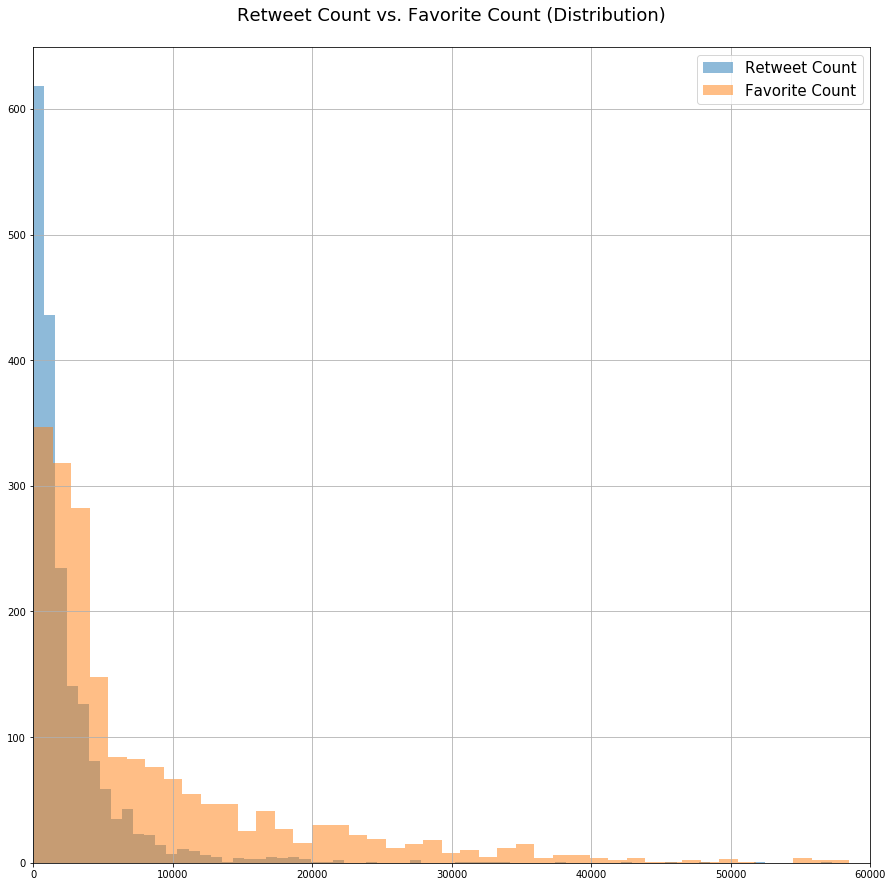

In [63]:
plt.figure(figsize=(15,15))
final_df.retweet_count.hist(alpha=0.5, bins=100, label='Retweet Count')
final_df.favorite_count.hist(alpha=0.5, bins=100, label='Favorite Count')
plt.title('Retweet Count vs. Favorite Count (Distribution)\n', size = 18)
plt.legend(loc='upper right', fontsize = 15)
plt.xlim(0,60000)
plt.show()

In [64]:
final_df.loc[:,['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,1918.000000,1918.000000
mean,2772.740355,8956.369656
std,4692.018340,12212.393117
min,16.000000,81.000000
25%,631.250000,2026.500000
50%,1366.500000,4148.000000
75%,3239.500000,11486.250000
max,79515.000000,132810.000000


Looking at the histogram above, we note that the distribution of both retweets and favorite is significantly right-skewed, however, the mean of favorite count (8895.7) is greater than retweet count (2766.7). We also note that the maximum number of favorite a tweet received was 132,810, where the maximum number of retweets a tweet received was 79,515.

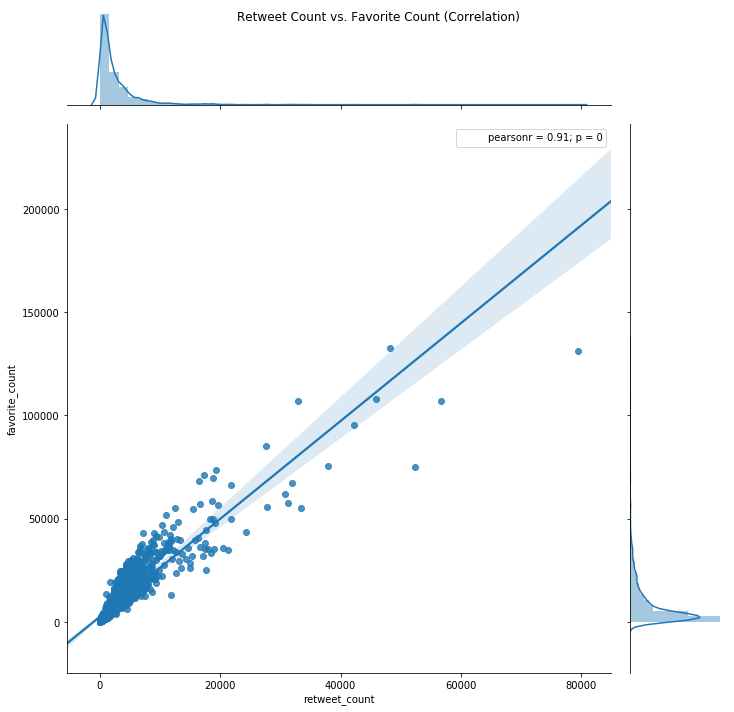

In [65]:
p = sns.jointplot(x=final_df.retweet_count,y=final_df.favorite_count, size=10, kind='reg');
p.fig.suptitle('Retweet Count vs. Favorite Count (Correlation)\n');

Looking at the plot above, we note there is a positive correlation between the favorite_count and the retweet_count. In other words, as the number of retweet increases and the number of favorites increases as well, which is expected as most people who would mark a tweet as favorite are likely to retweet that tweet.

Text(0,0.5,'Count')

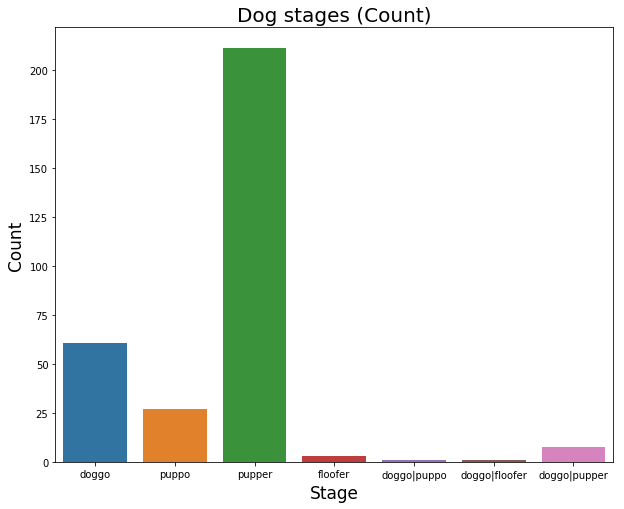

In [66]:
plt.figure(figsize = (10,8))
ax = sns.countplot(data=final_df, x='stage')
ax.set_title('Dog stages (Count)', fontsize = 20)
plt.xlabel("Stage",fontsize=17)
plt.ylabel("Count", fontsize=17)

In [67]:
final_df.stage.value_counts()

pupper           211
doggo            61 
puppo            27 
doggo|pupper     8  
floofer          3  
doggo|puppo      1  
doggo|floofer    1  
Name: stage, dtype: int64

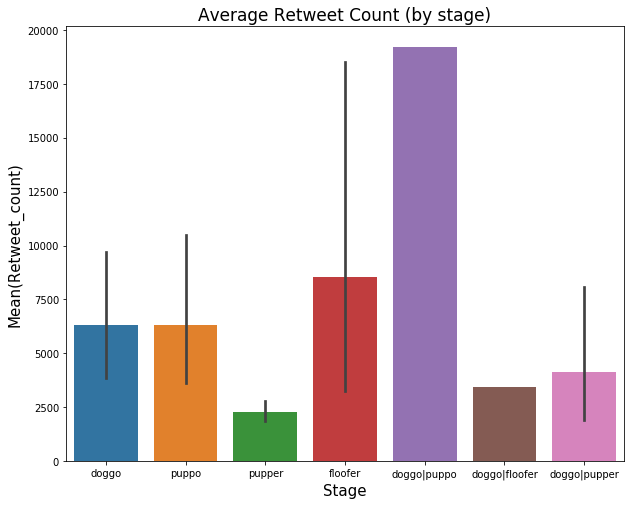

In [68]:
p=sns.barplot(data=final_df, x='stage', y='retweet_count')
p.set_title('Average Retweet Count (by stage)', fontsize = 17)
plt.xlabel("Stage",fontsize=15)
plt.ylabel("Mean(Retweet_count)", fontsize=15)
p.figure.set_size_inches(10,8)

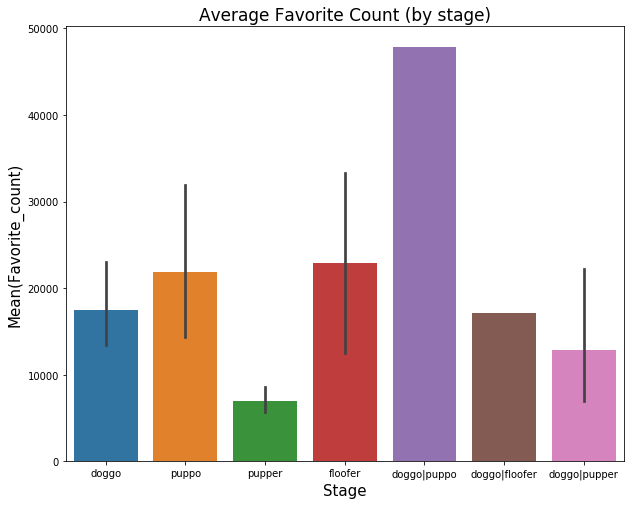

In [69]:
p=sns.barplot(data=final_df, x='stage', y='favorite_count')
p.set_title('Average Favorite Count (by stage)', fontsize = 17)
plt.xlabel("Stage",fontsize=15)
plt.ylabel("Mean(Favorite_count)", fontsize=15)
p.figure.set_size_inches(10,8)

Looking at the plots above, we note the following:
- The pupper stage has the highest count where the (doggo|floofer) and (doggo|puppo) has the lowest count.
- The average retweet_count for (doggo|puppo) is the highest (greater than 17,500 retweets), where the average retweet_count for the pupper is the lowest (less than 2,500). 
- Similarly, the average favorite_count for (doggo|puppo) stage has the highest average favorit_count, where the pupper has the lowest average favorite count.

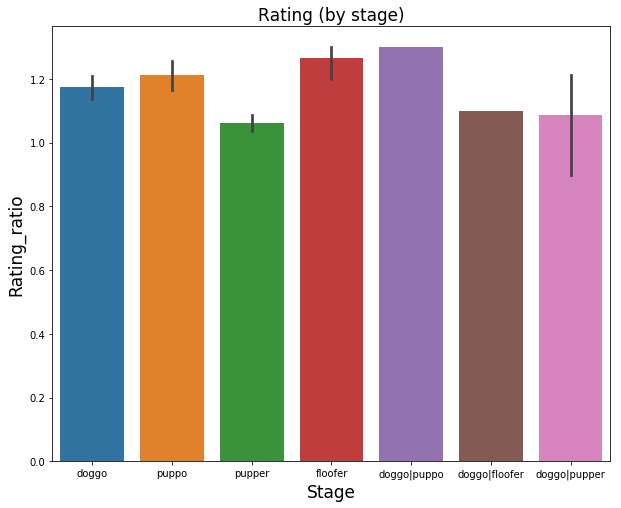

In [70]:
p=sns.barplot(data=final_df, x='stage', y='rating_ratio')
p.set_title('Rating (by stage)', fontsize = 17)
plt.xlabel("Stage",fontsize=17)
plt.ylabel("Rating_ratio", fontsize=17)
p.figure.set_size_inches(10,8)

Looking at the plot above, we note the doggo|puppo stage has the highest average rating where the pupper stage has the lowest rating.

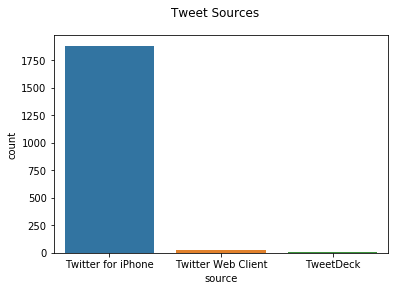

In [71]:
p = sns.countplot(data=final_df, x='source')
p.figure.suptitle('Tweet Sources');

In [72]:
pd.crosstab(final_df.source,final_df.stage, margins=True)

stage,doggo,doggo|floofer,doggo|pupper,doggo|puppo,floofer,pupper,puppo,All
source,,,,,,,,
TweetDeck,1,0,0,0,0,1,0,2
Twitter Web Client,1,0,0,0,0,1,0,2
Twitter for iPhone,59,1,8,1,3,209,27,308
All,61,1,8,1,3,211,27,312


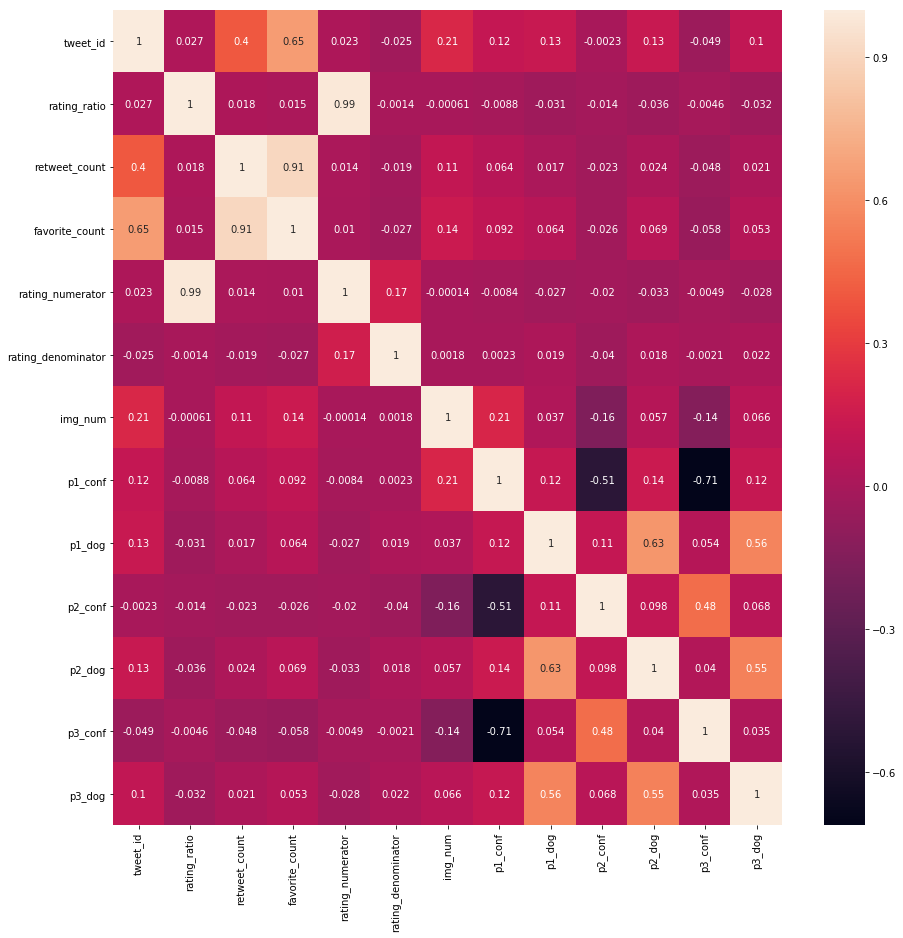

In [73]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(final_df.corr(),annot=True, ax=ax);

Looking at the heatmap above, we note the following:
- There is a strong positive correlation (0.92) between `favorite_count` and `retweet_count` which support our observation above.
- There is a strong positive correlation (0.92) between `rating_ratio` and `rating_numerator` which is given (rating_ratio is based on the rating_numerator and rating denominator)
- There is a relatively strong negative correlation (-0.71) between `p3_conf` and `p1_conf` which is interesting as different predictions may have opposing confidence levels. 

### References

- [Toufik](https://github.com/tkannab/Udacity-DAND-T2-P3-DW.git)